<a href="https://colab.research.google.com/github/Justin-Jonany/FLARE_Implementation/blob/main/notebooks_and_demonstration/2_FLARE_for_fund_statements.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FLARE for Fund Statement PDF Extraction**
Although a zero-shot PDF Extraction with GPT 4o is typically decent, it gets harder as the PDF gets more complicated. For the case of Fund Statements Extraction, the performance of a zero-shot prompting may not be the most optimal because of the following issues:
1. 25 Fields to extract, meaning the prompt will be long to explain each field, decreasing the LLM's performance.
2. Different fund statements have different structure, so fields can be found different pages of the statement.
3. Statements can have structured data like tables or charts, so the result of the extract may not be ideal, increasing risk of hallucination.
4. A PDF can contain multiple statements, and each of the statement can have different number of pages.

With all these problems to tackle, there's so much risk of hallucination that a zero-shot prompting can incur. Now, it may seem silly to use RAG for PDF Extraction, because we would need the whole PDF to extract the fields, so here, I create a class called `Fakre_Retriever` where it will always return the whole page when called for context.

All functions can be accessed in my github repository: [github.com/Justin-Jonany/FLARE_Implementation](https://github.com/Justin-Jonany/FLARE_Implementation)

## Steps
The goal of the notebook is of course to extract 25 fields from any fund statement from any financial institutions. There will be three main steps to the process:\
&nbsp;&nbsp;&nbsp;&nbsp;Step 1. Extracting information from the PDF into text per page\
&nbsp;&nbsp;&nbsp;&nbsp;Step 2. Extracting 25 fields from the text per page with LLM\
&nbsp;&nbsp;&nbsp;&nbsp;Step 3. Combining the output of the LLM to fund statements\
### Step 1. Extracting information from the PDF into text per page
This step will be done by first turning the PDF into an image because a PDF can contain text, charts, and tables. Then, two types of OCR, PyTesseract and EasyOCR, will be used to extra the texts, and the performance will be compared in the end. All of this will be done page-per-page.

Note: After finishing this project, I found a library called [PyMuPDF4LLM](https://pymupdf.readthedocs.io/en/latest/pymupdf4llm/), where it extracts a PDF, turning text it into markdown, perfect for LLM,  and getting the images, where I can use OCR to extrac the text. I used this library for zero-shot prompting PDF extraction with Llama3 and managed to increase the accuracy from 85%% when using OCR for pdf-to-text, to 94%.

### Step 2. Extracting 25 fields from the text per page with LLM
There will be 2 methods of extraction: Regular and FLARE. The only difference is that in the first things in Step 2 is zero-shot prompting and FLARE. After getting the initial extract, a call to the LLM to clean the output into a python dictionary will be done. On the rare occassions that the cleaning fails, the whole extraction repeats up to a specified time.

### Step 3. Combining the output of the LLM to fund statements
Now that we have dictionaries of the fields found in each page in a PDF (where each PDF can have multiple funds of different number of pages), we need to combine them. This will be done recursively through quite a number of steps. However, the algorithm revolves around the assumption that the initial start of a fund will always have the number of fields, and each fund will have 3-5 pages. Although not perfect and haven't been tested on a large dataset, this algorithm hasn't faced any issue so far. The implementation of this can be found [here](https://github.com/Justin-Jonany/FLARE_Implementation/blob/main/fund_statement_extractor/extractor.py)


# Libraries

In [ ]:
!git clone https://github.com/Justin-Jonany/FLARE_Implementation.git

Cloning into 'FLARE_Implementation'...
remote: Enumerating objects: 231, done.
remote: Counting objects: 100% (231/231), done.
remote: Compressing objects: 100% (151/151), done.
remote: Total 231 (delta 120), reused 179 (delta 72), pack-reused 0 (from 0)
Receiving objects: 100% (231/231), 5.93 MiB | 11.27 MiB/s, done.
Resolving deltas: 100% (120/120), done.


In [ ]:
pip install -r FLARE_Implementation/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 375.0/375.0 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 405.1/405.1 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 51.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2

In [ ]:
!sudo apt-get update
!apt-get install poppler-utils
!apt install tesseract-ocr
!apt install libtesseract-dev

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Ign:3 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Get:7 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,583 kB]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:13 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:14 http://archive.ubuntu.com/ubuntu ja

In [ ]:
from FLARE_Implementation.flare import *
from FLARE_Implementation.fund_statement_extractor.extractor import *

from os import listdir
from os.path import isfile, join
from google.colab import userdata
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Setting Up Workspace

In [ ]:
# Initalizing Extractor Object
fundstatement_pdf_extractor = FundStatementExtractor(api_key=userdata.get('OPENAI_API_KEY'))

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

/usr/local/lib/python3.10/dist-packages/easyocr/detection.py:78: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(copyStateDict(torch.load(trained_model, ma

In [ ]:
# so we can see all the columns in a pandas dataframe
pd.set_option('display.max_columns', None)

# Data

In [ ]:
path_to_pdf = '/content/FLARE_Implementation/fund_statement_dataset/'
onlyfiles = [f for f in listdir(path_to_pdf) if isfile(join(path_to_pdf, f))]
onlyfiles

['4 -  FNB CIBC (000046387) - Final ETF facts - English.pdf',
 '1 -  FNB AGF (000039738) - Final ETF facts - English.pdf',
 '3 -  Hamilton ETFs 4 (000053958) - Final ETF facts - English 2.pdf',
 '2 - Fidelity Mutual Funds - Winter 2024 (000102211) - Final ETF facts - English.pdf',
 '5 -  Horizons USD High Interest Savings ETF (000055830) - Final ETF facts - English.pdf']

In [ ]:
full_paths = [(path_to_pdf + i) for i in onlyfiles]
full_paths

['/content/FLARE_Implementation/fund_statement_dataset/4 -  FNB CIBC (000046387) - Final ETF facts - English.pdf',
 '/content/FLARE_Implementation/fund_statement_dataset/1 -  FNB AGF (000039738) - Final ETF facts - English.pdf',
 '/content/FLARE_Implementation/fund_statement_dataset/3 -  Hamilton ETFs 4 (000053958) - Final ETF facts - English 2.pdf',
 '/content/FLARE_Implementation/fund_statement_dataset/2 - Fidelity Mutual Funds - Winter 2024 (000102211) - Final ETF facts - English.pdf',
 '/content/FLARE_Implementation/fund_statement_dataset/5 -  Horizons USD High Interest Savings ETF (000055830) - Final ETF facts - English.pdf']

In [ ]:
pdf_data_dict_easyocr, page_counts_easyocr = fundstatement_pdf_extractor.text_from_pdf(full_paths, 8, 'easyocr')
pd.DataFrame(pdf_data_dict_easyocr).reset_index().rename(columns={'index': 'page_number'}).to_csv('easyocr_output.csv', index=False)

KeyboardInterrupt: 

In [ ]:
pdf_data_dict_pytesseract, page_counts_pytesseract = fundstatement_pdf_extractor.text_from_pdf(full_paths, 8, 'pytesseract')
pd.DataFrame(pdf_data_dict_pytesseract).reset_index().rename(columns={'index': 'page_number'}).to_csv('pytesseract_output.csv', index=False)

# FLARE

In [ ]:
# get raw_dict
extract = fundstatement_pdf_extractor.dict_from_text(pdf_data_dict_easyocr, method='flare', verbose=False)

Extracting: "/content/FLARE_Implementation/fund_statement_dataset/3 -  Hamilton ETFs 4 (000053958) - Final ETF facts - English 2.pdf"
Page 1/3
Page 2/3
Page 3/3
Extracting: "/content/FLARE_Implementation/fund_statement_dataset/2 - Fidelity Mutual Funds - Winter 2024 (000102211) - Final ETF facts - English.pdf"
Page 1/3
Page 2/3
Page 3/3
Extracting: "/content/FLARE_Implementation/fund_statement_dataset/4 -  FNB CIBC (000046387) - Final ETF facts - English.pdf"
Page 1/9
Page 2/9
Page 3/9
Page 4/9
Page 5/9
Page 6/9
Page 7/9
Page 8/9
Page 9/9
Extracting: "/content/FLARE_Implementation/fund_statement_dataset/1 -  FNB AGF (000039738) - Final ETF facts - English.pdf"
Page 1/9
Page 2/9
Page 3/9
Page 4/9
Page 5/9
Page 6/9
Page 7/9
Page 8/9
Page 9/9
Extracting: "/content/FLARE_Implementation/fund_statement_dataset/5 -  Horizons USD High Interest Savings ETF (000055830) - Final ETF facts - English.pdf"
Page 1/3
Page 2/3
Page 3/3


In [ ]:
# convert to dataframe
df = fundstatement_pdf_extractor.dict_to_df(extract)

/content/FLARE_Implementation/fund_statement_extractor/extractor.py:307: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([pd.DataFrame([i]) for i in rows], ignore_index=True)
/content/FLARE_Implementation/fund_statement_extractor/extractor.py:317: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: None if isinstance(
/content/FLARE_Implementation/fund_statement_extractor/extractor.py:321: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(


In [ ]:
# save raw_df
df.to_csv('flare_raw_df.csv', index=False)

In [ ]:
# extract sequences
df_sequences, dict_sequences = fundstatement_pdf_extractor.extract_sequences(df)

In [ ]:
# for backfill - squashing of multiple pages into a single row
cols_to_fill = ['fund_manager', 'portfolio_manager',
                'document_date', 'etf_start_date', 'assets_date', 'fundname',
                'etf_ticker', 'management_expense_ratio', 'distributions', 'minimum_investment',
                'totalfundvalue', 'stock_exchange', 'currency',
                'avg_daily_volume', 'number_of_days_traded', 'market_price', 'nav',
                'avg_bid-ask_spread', 'riskrating', 'trading_expense_ratio',
                'best_return', 'worst_return', 'average_return','assets_mix', 'top_investments']

# final output
final_output_df = fundstatement_pdf_extractor.combine_sequences_to_create_extract(df, df_sequences, cols_to_fill)

In [ ]:
display(final_output_df)

,index,filename,page,fund_manager,portfolio_manager,document_date,etf_start_date,assets_date,fundname,etf_ticker,management_expense_ratio,distributions,minimum_investment,totalfundvalue,stock_exchange,currency,avg_daily_volume,number_of_days_traded,market_price,nav,avg_bid-ask_spread,riskrating,assets_mix,top_investments,best_return,worst_return,average_return,trading_expense_ratio,row_numbers,value_counts,in_between_pages,title_page
0,0,/content/FLARE_Implementation/fund_statement_d...,0,Hamilton Capital Partners Inc.,Hamilton Capital Partners Inc,[2024-01-12],[2022-02-04],[2023-11-30],[Hamilton Enhanced U.S. Covered Call ETF],[HYLD],[2.4],[Monthly],NaN,4.374981e+08,TSX,CAD,[260729],[251],"[11.23, 12.75]","[11.22, 12.73]",0.109,Medium,"[(Canadian Equities, 35.0), (U.S. Equities, 68...","[(JPMorgan Equity Premium Income ETF, 18.2), (...",NaN,NaN,[-3.0],[0.08],0,21,NaN,1
3,3,/content/FLARE_Implementation/fund_statement_d...,0,Fidelity Investments Canada ULC,Fidelity Investments Canada ULC,[2024-01-19],[2024-01-19],[2023-11-30],[Fidelity Canadian Long/Short Alternative Fund],[FCLS],[0.95],"[Annually, in mid to late December]",NaN,NaN,NEO,CAD,NaN,NaN,NaN,NaN,NaN,Medium,NaN,NaN,NaN,NaN,NaN,NaN,3,12,NaN,1
6,6,/content/FLARE_Implementation/fund_statement_d...,0,CIBC Asset Management Inc.,CIBC Asset Management Inc.,[2024-01-15],[2023-01-23],[2023-11-30],[CIBC Canadian Short-Term Bond Index ETF],[CSBI],[0.08],"[Monthly, net income, monthly, if any, Any rem...",NaN,7.959488e+06,TSX,CAD,NaN,NaN,NaN,NaN,NaN,Low,"[(Government of Canada & Guaranteed Bonds, 53....","[(Government of Canada, 3.00%, 2024/11/01, 6.3...",NaN,NaN,NaN,[0.0],6,17,NaN,1
9,9,/content/FLARE_Implementation/fund_statement_d...,3,CIBC Asset Management Inc,CIBC Asset Management Inc,[2024-01-15],[2021-03-31],[2023-11-30],[CIBC Canadian Bond Index ETF],[CCBI],[0.07],"[Monthly, Net income, monthly, if any; Any rem...",NaN,8.415981e+08,TSX,CAD,[3767],[247],"[16.58, 18.2]","[16.61, 18.17]",0.180,Low,"[(Government of Canada & Guaranteed Bonds, 44....","[(Government of Canada, 1.50%, 2031/12/01, 8.0...","[2022-07-31, 1.3]","[2022-04-30, -6.6]",[-2.3],[0.0],9,22,NaN,1
12,12,/content/FLARE_Implementation/fund_statement_d...,6,CIBC Asset Management Inc.,CIBC Asset Management Inc.,[2024-01-15],[2021-09-16],[2023-11-30],[CIBC Global Bond ex-Canada Index ETF (CAD-Hed...,[CGBI],[0.22],"[Monthly, if any, Any remaining net income or ...",NaN,5.311375e+09,TSX,CAD,[4705],[193],"[16.56, 17.63]","[16.54, 17.63]",0.380,Low,"[(iShares MBS ETF, 16.5), (United States Dolla...","[(iShares MBS ETF, 16.5), (United States Treas...","[2022-07-31, 0.7]","[2022-10-31, -6.6]",[-5.1],[0.0],12,22,NaN,1
15,15,/content/FLARE_Implementation/fund_statement_d...,0,AGF Investments Inc.,AGF Investments Inc.,[2024-01-26],[2020-10-02],[2023-12-31],[AGF Global Opportunities Bond ETF],[AGLB],[0.65],"[Quarterly, if any]",NaN,3.210000e+07,Cboe CA,CAD,[1034],[147],"[21.05, 23.0]","[22.11, 22.37]",0.380,low,"[(Government, 53.0), (Corporate, 29.2), (Other...",[(Government of United States of America 4.50%...,"[2023-12-31, 5.2]","[2022-04-30, -4.4]",[-0.9],[0.0],15,21,NaN,1
19,19,/content/FLARE_Implementation/fund_statement_d...,4,AGF Investments Inc.,AGF Investments Inc.,[2024-01-26],[2020-10-02],[2023-12-31],[AGF Global Sustainable Growth Equity ETF],[AGSG],[0.65],"[Quarterly, if any]",NaN,1.880000e+07,Cboe CA,CAD,[2697],[249],"[23.26, 27.76]","[26.75, 27.12]",0.250,Medium,"[(Cash & Cash Equivalents, 6.8), (United State...","[(Ecolab Inc., 3.7), (Trex Co Inc., 3.6), (Das...","[2021-08-31, 17.3]","[2022-02-28, -16.7]",[2.8],[0.14],19,21,NaN,1
23,23,/content/FLARE_Implementation/fund_statement_d...,8,AGF Investments Inc.,AGF Investments Inc.,[2024-01-26],[2017-01-30],[2023-12-31],[AGF Systematic Canadian Equity ETF],[QCD],[0.45],[Annually],NaN,4.690000e+07,TSX,CAD,[3342],[232],"[30.29, 33.68]","[32.3, 33.6]",0.080,NaN,"[(Financials, 36.4), (Energy, 16.7), (Industri...","[(Royal Bank of Canada, 7.6), (Toronto-Dominio...",N

In [ ]:
final_output_df.to_csv('flare_extraction.csv', index=False)

# Regular Extraction

In [ ]:
# get raw_dict
extract_regular = fundstatement_pdf_extractor.dict_from_text(pdf_data_dict_easyocr, method='regular')

# convert to dataframe
df_regular = fundstatement_pdf_extractor.dict_to_df(extract_regular)

# save raw_df
df_regular.to_csv('regular_raw_df.csv', index=False)

# extract sequences
df_sequences_regular, dict_sequences_regular = fundstatement_pdf_extractor.extract_sequences(df_regular)

# for backfill - squashing of multiple pages into a single row
cols_to_fill = ['fund_manager', 'portfolio_manager',
                'document_date', 'etf_start_date', 'assets_date', 'fundname',
                'etf_ticker', 'management_expense_ratio', 'distributions', 'minimum_investment',
                'totalfundvalue', 'stock_exchange', 'currency',
                'avg_daily_volume', 'number_of_days_traded', 'market_price', 'nav',
                'avg_bid-ask_spread', 'riskrating', 'trading_expense_ratio',
                'best_return', 'worst_return', 'average_return','assets_mix', 'top_investments']

# final output
final_output_df_regular = fundstatement_pdf_extractor.combine_sequences_to_create_extract(df_regular, df_sequences_regular, cols_to_fill)

Extracting: "/content/FLARE_Implementation/fund_statement_dataset/3 -  Hamilton ETFs 4 (000053958) - Final ETF facts - English 2.pdf"
Page 1/3
Page 2/3
Page 3/3
Extracting: "/content/FLARE_Implementation/fund_statement_dataset/2 - Fidelity Mutual Funds - Winter 2024 (000102211) - Final ETF facts - English.pdf"
Page 1/3
Page 2/3
Page 3/3
Extracting: "/content/FLARE_Implementation/fund_statement_dataset/4 -  FNB CIBC (000046387) - Final ETF facts - English.pdf"
Page 1/9
Page 2/9
Page 3/9
Page 4/9
Page 5/9
Page 6/9
Page 7/9
Page 8/9
Page 9/9
Extracting: "/content/FLARE_Implementation/fund_statement_dataset/1 -  FNB AGF (000039738) - Final ETF facts - English.pdf"
Page 1/9
Page 2/9
Page 3/9
Page 4/9
Page 5/9
Page 6/9
Page 7/9
Page 8/9
Page 9/9
Extracting: "/content/FLARE_Implementation/fund_statement_dataset/5 -  Horizons USD High Interest Savings ETF (000055830) - Final ETF facts - English.pdf"
Page 1/3
Page 2/3
Page 3/3


/content/FLARE_Implementation/fund_statement_extractor/extractor.py:307: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([pd.DataFrame([i]) for i in rows], ignore_index=True)
/content/FLARE_Implementation/fund_statement_extractor/extractor.py:317: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: None if isinstance(
/content/FLARE_Implementation/fund_statement_extractor/extractor.py:321: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(


In [ ]:
final_output_df_regular.to_csv('regular_extraction.csv', index=False)

# FLARE vs Regular PDF Extraction
Due to the LLM's nature, the output of the extraction must be done manually to check each field. There would be better ways to do it such as by creating a ground truth dataframe, and a general cleaning function to clean the final output received above. However, due to resource limtiation for the API, I've decided to only select 8 different ETF Series to extract, making it relatively easy to manually mark them.

There are 25 fields that are requested to the LLM, and since there are 8 series, there are 200 outputs that's going to be assesed.

### Categories
The categories of assesment will be divided into two: **Overall** and **LLM**. The mistakes in the output sometimes are caused by the OCR, like not reading the "." in decimals or not reading some characters, and not the llm. For each category, it will be assessed for two OCR libraries: **Pytesseract** and **EasyOCR**. The metric that will be used will only be accuracy.


Here are the hand-marked output:\
[FLARE: EasyOCR](https://github.com/Justin-Jonany/FLARE_Implementation/blob/main/fund_statement_extractor/output/easyocr/FLARE_EasyOCR.jpg)

[Regular: EasyOCR](https://github.com/Justin-Jonany/FLARE_Implementation/blob/main/fund_statement_extractor/output/easyocr/Regular_EasyOCR.png)

[FLARE: Pytesseract](https://github.com/Justin-Jonany/FLARE_Implementation/blob/main/fund_statement_extractor/output/pytesseract/FLARE_Pytesseract.png)

[Regular: Pytesseract](https://github.com/Justin-Jonany/FLARE_Implementation/blob/main/fund_statement_extractor/output/pytesseract/Regular_Pytesseract.png)


### Result
Here's the summary of the results:


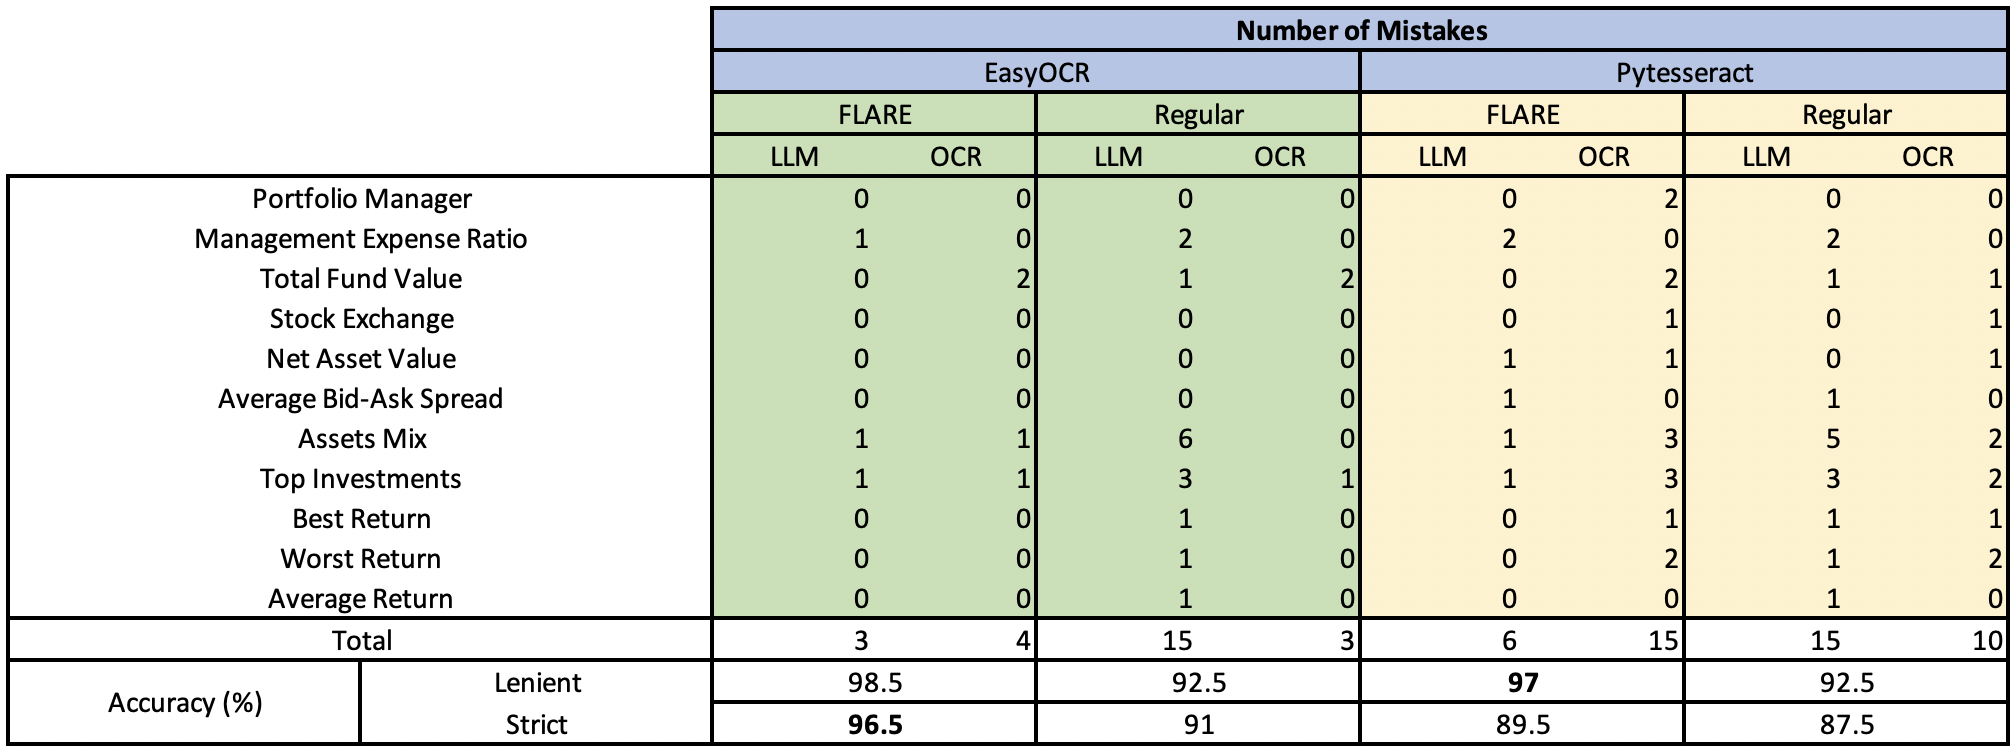

### Data and Helper Functions

In [ ]:
flare_pytesseract_output = pd.read_csv('FLARE_Implementation/fund_statement_extractor/output/pytesseract/final_outputs/flare_extraction.csv')
regular_pytesseract_output = pd.read_csv('FLARE_Implementation/fund_statement_extractor/output/pytesseract/final_outputs/regular_extraction.csv')
flare_easyocr_output = pd.read_csv('FLARE_Implementation/fund_statement_extractor/output/easyocr/final_outputs/flare_extraction.csv')
regular_easyocr_output = pd.read_csv('FLARE_Implementation/fund_statement_extractor/output/easyocr/final_outputs/regular_extraction.csv')

pytesseract_ocr_output = pd.read_csv('/content/FLARE_Implementation/fund_statement_extractor/output/pytesseract/pytesseract_output.csv')
easyocr_ocr_output = pd.read_csv('/content/FLARE_Implementation/fund_statement_extractor/output/easyocr/easyocr_output.csv')

In [ ]:
def pretty_print_investments(input):
  print(f'[{eval(input)[0]},')
  for investment in eval(input)[1:-1]:
    print(f'{investment},')
  print(f'{eval(input)[-1]}]')

def lined_print_page(input):
  for i, line in enumerate(input.split('\n'), 1): print(f'{i}{" " if i < 10 else ""}|  {line}')

## Analysis



### OCR Mistake
From the table above, we can see that a lot of the issues are actually from the OCR and not the LLM itself. We can clearly see this from **EasyOCR's strict accuracy being 5% better than Pytesseract**. These mistakes are typically either parts of the PDF not extracted, and thus not appearing in the OCR output, or decimal points not caught, and thus read a decimal point off.

In [ ]:
print(f"Filename\t: {flare_pytesseract_output.iloc[1]['filename'].split('/')[-1]}")
print(f"Start Page\t: {flare_pytesseract_output.iloc[1]['page']}")
print(f"OCR\t\t: Pytesseract")
print('='*90)
print(f"Top Investments\n")
print(f"Method\t\t: FLARE")
pretty_print_investments(flare_pytesseract_output.iloc[1]['top_investments'])
print()
print(f"Method\t\t: Regular")
pretty_print_investments(regular_pytesseract_output.iloc[1]['top_investments'])


Filename	: 1 -  FNB AGF (000039738) - Final ETF facts - English.pdf
Start Page	: 0
OCR		: Pytesseract
Top Investments

Method		: FLARE
[('Government of United States of America 4.50% November 15, 2033', 61),
('Government of United States of America 4.75% November 15, 2053', 48),
('Government of France O.AT. 3.50% November 25, 2033', 45),
('Government of United States of America 4.75% November 15, 2043', 3.4),
('Government of United States of America Inflation Index Linked 2.00% January 15, 2026', 3.2),
('Government of United States of America 4.375% December 15, 2026', 3.0),
('Government of Canada 2.25% June 1, 2029', 29),
('Government of United States of America Treasury Bill 0.00% January 9, 2024', 25),
('Government of United States of America 4.375% November 30, 2030', 24),
('Government of United States of America Treasury Bill 0.00% January 16, 2024', 20)]

Method		: Regular
[('Government of United States of America 4.50% November 15, 2033', 61.0),
('Government of United States of 


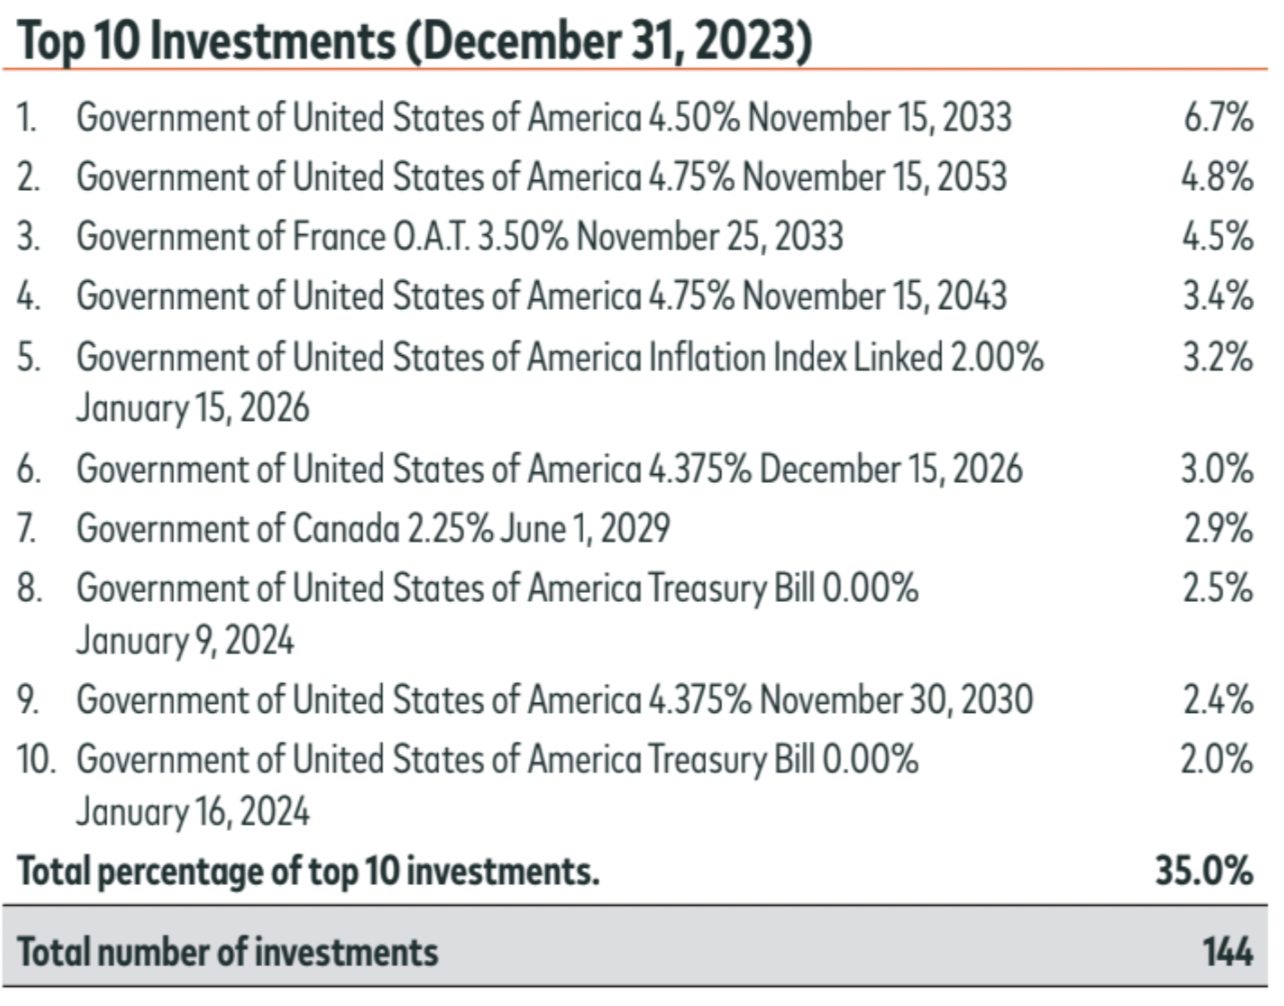



We can clearly see here that even though we got all 10 investments, we didn't get all the numbers correct. Some of them are missing the decimal points.

In [ ]:
lined_print_page(pytesseract_ocr_output[full_paths[0]].iloc[0])

1 |  CIBC ASSET
2 |  MANAGEMENT
3 |  
4 |  CIBCO® ETF Facts
5 |  
6 |  CIBC Asset Management Inc.
7 |  
8 |  January 15, 2024
9 |  CIBC Canadian Short-Term Bond Index ETF (CSBI)
10|  
11|  This document contains key information you should know about CIBC Canadian Short-Term Bond Index ETF. You can find more details about this
12|  exchange-traded fund (ETF) in its prospectus. Ask your representative for a copy, contact CIBC Asset Management Inc. at 1 888 888-3863 or
13|  info@cibcassetmanagement.com, or visit www.cibc.com/etfs.
14|  
15|  Before you invest, consider how the ETF would work with your other investments and your tolerance for risk.
16|  
17|   
18|  
19|   
20|  
21|  Quick Facts
22|  Date ETF started: January 23, 2023
23|  
24|  Total value on November 30, 2023 $7,959,488
25|  
26|  Management expense ratio (MER): 0.08%
27|  
28|  Fund manager:
29|  
30|  CIBC Asset Management Inc.
31|  
32|  CIBC Asset Management Inc.
33|  
34|  Distributions: Net income, monthly, if any

From line 63 - 75 above, we can see here that it's indeed the Pytesseract's fault, and the LLM is just getting the extracts from the OCR.

Here's one last example:

In [ ]:
print(f"Filename\t\t: {flare_pytesseract_output.iloc[4]['filename'].split('/')[-1]}")
print(f"Start Page\t\t: {flare_pytesseract_output.iloc[4]['page']}")
print(f"OCR\t\t\t: Pytesseract")
print('='*90)
print(f"Fund Manager\n")
print(f"Method\t\t: FLARE")
print(flare_pytesseract_output.iloc[4]['portfolio_manager'])
print()
print(f"Method\t\t: Regular")
print(regular_pytesseract_output.iloc[4]['portfolio_manager'])

Filename		: 4 -  FNB CIBC (000046387) - Final ETF facts - English.pdf
Start Page		: 0
OCR			: Pytesseract
Fund Manager

Method		: FLARE
nan

Method		: Regular
CIBC Asset Management Inc.


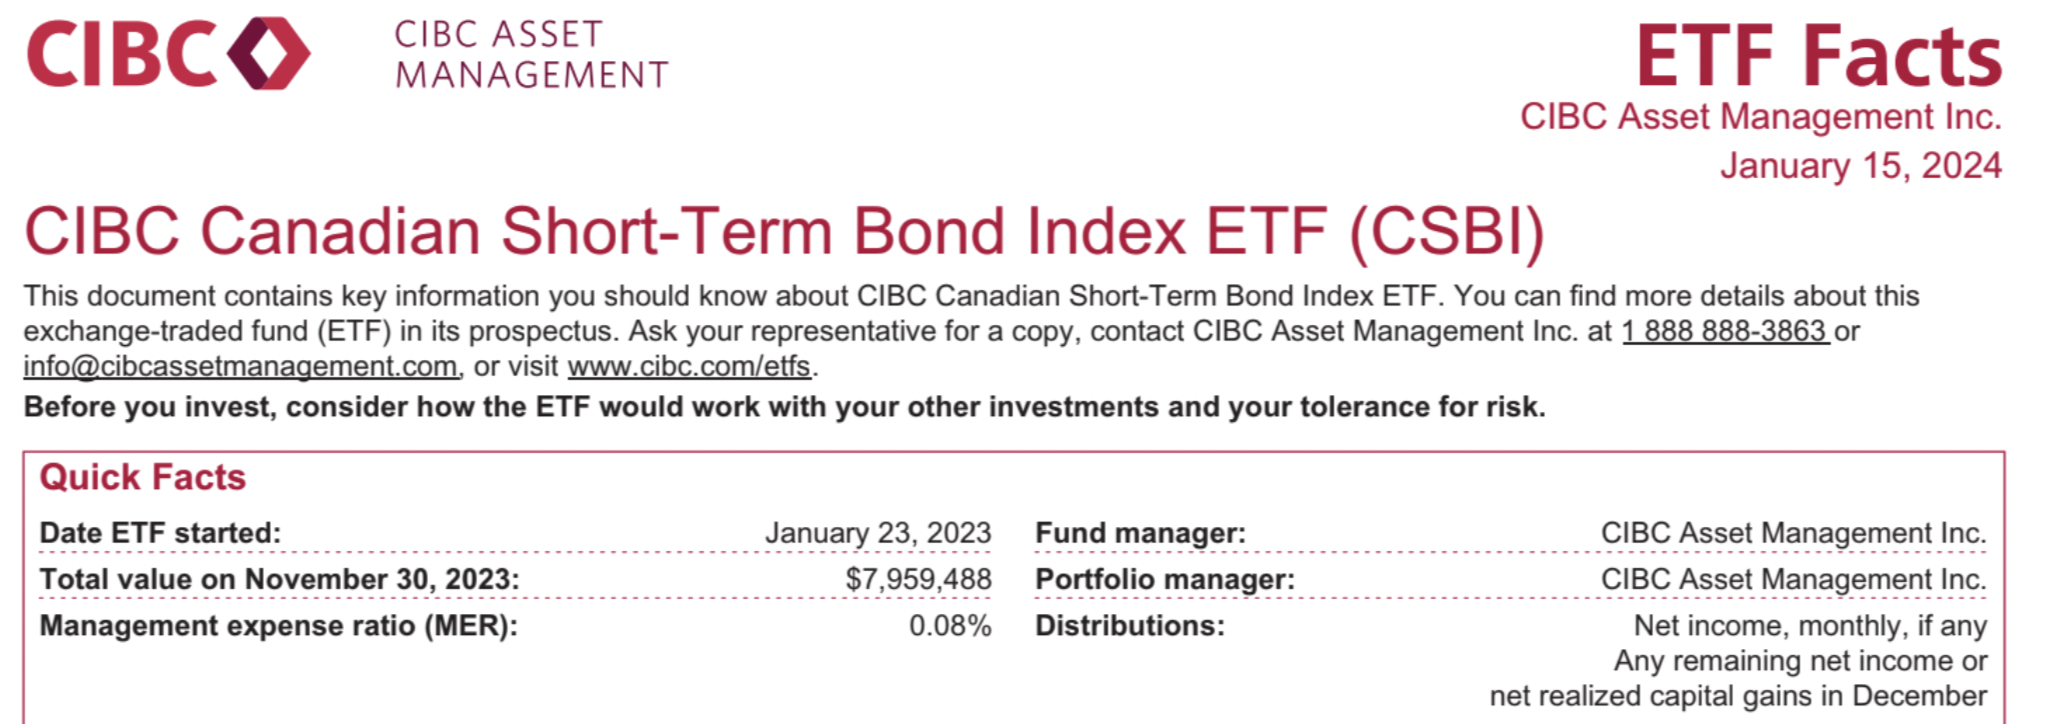

In [ ]:
lined_print_page(pytesseract_ocr_output[full_paths[4]].iloc[0])

1 |  HORIZONS ETFs
2 |  
3 |  by Mirae Asset
4 |  
5 |  A,
6 |  4
7 |  
8 |  ETF Facts
9 |  
10|  January 12, 2024
11|  
12|  Horizons USD High Interest Savings ETF (UCSH.U) - Class A Units
13|  Manager: Horizons ETFs Management (Canada) Inc.
14|  
15|  This document contains key information you should know about Horizons USD High Interest Savings ETF. You can find more details about this
16|  exchange traded fund (ETF) in its prospectus. Ask your representative for a copy, contact Horizons ETFs Management (Canada) Inc. at
17|  
18|  info@horizonsetfs.com or 1-866-641-5739, or visit www.horizonsetfs.com.
19|  
20|  Before you invest, consider how the ETF would work with your other investments and your tolerance for risk.
21|  
22|   
23|  
24|  The ETF is not covered by the Canada Deposit Insurance Corporation, the Federal Deposit Insurance Corporation or any other government deposit insurer.
25|  
26|   
27|  
28|   
29|  
30|  Quick facts
31|  Date ETF started:
32|  Total value on «:

From line 28-32 above, we can clearly see that it got fund manager, but not portfolio manager, despite outputting "CIBC Asset Management Inc." twice. Eventhough the regular pdf extraction got it right, **FLARE is technically better because it didn't make up information about the portfolio manager, since it's not actually given in the context**.

### Notable Improvements
From here onwards, the analysis will be **focused towards EasyOCR's output**, since we wanna focus more on the LLM.

We can also see that one of the fields that the LLM seems to struggle the most are assets mix and assets mix. Although not perfect, FLARE in some cases manage to get it right when Regular doesn't.

For "assets mix", FLARE got 2 of Regular's mistake correct (assuming we are not considering the OCR's mistake). For "top investments", FLARE also got 1 of Regular's mistake. In both cases, Regular's mistake is usually either not being able to gather the whole list or modifying the data slightly. This where FLARE comes in and fixes them.

Here're some examples:

In [ ]:
print(f"Filename\t: {flare_easyocr_output.iloc[3]['filename'].split('/')[-1]}")
print(f"Start Page\t: {flare_easyocr_output.iloc[3]['page']}")
print(f"OCR\t\t: EasyOCR")
print('='*90)
print(f"Assets Mix\n")
print(f"Method\t\t: FLARE")
pretty_print_investments(flare_easyocr_output.iloc[3]['assets_mix'])
print()
print(f"Method\t\t: Regular")
pretty_print_investments(regular_easyocr_output.iloc[3]['assets_mix'])


Filename	: 4 -  FNB CIBC (000046387) - Final ETF facts - English.pdf
Start Page	: 3
OCR		: EasyOCR
Assets Mix

Method		: FLARE
[('Government of Canada & Guaranteed Bonds', 44.7),
('Provincial Government & Guaranteed Bonds', 34.2),
('Corporate Bonds', 16.9),
('Municipal Government & Guaranteed Bonds', 1.6),
('Cash', 4.0),
('Supranational Bonds', 0.8),
('Foreign Currency Bonds', 0.6),
('Other Assets, less Liabilities', -0.2)]

Method		: Regular
[('Government of Canada & Guaranteed Bonds', 44.7),
('Provincial Government & Guaranteed Bonds', 34.2),
('Corporate Bonds', 16.9),
('Municipal Government & Guaranteed Bonds', 1.6),
('Cash', 4.0),
('Other Assets, less Liabilities', -0.2)]


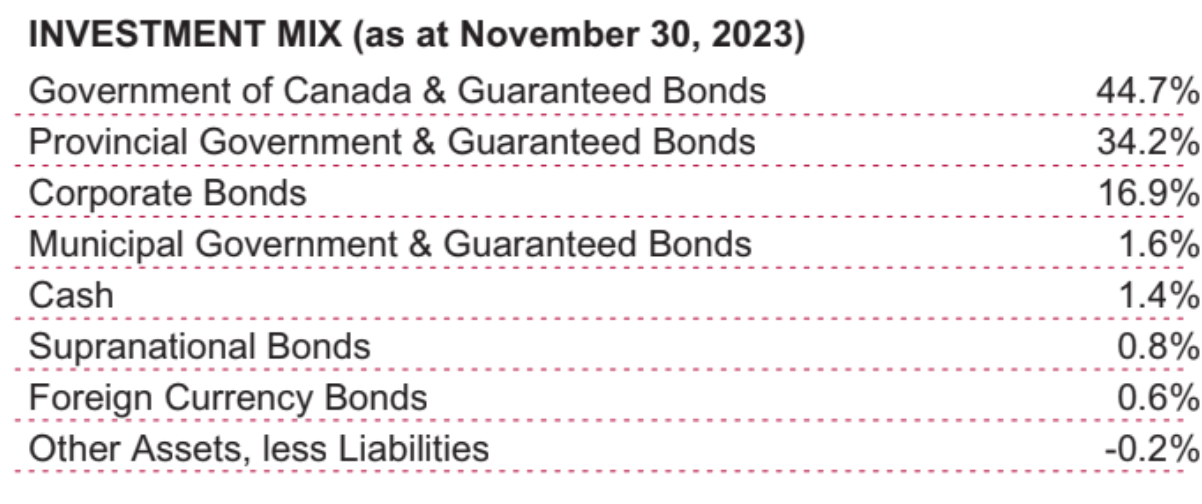

In [ ]:
full_paths[0]

'/content/FLARE_Implementation/fund_statement_dataset/4 -  FNB CIBC (000046387) - Final ETF facts - English.pdf'

In [ ]:
lined_print_page(easyocr_ocr_output.iloc[3][full_paths[0]])

1 |  CIBC ASSET
2 |  CIBC
3 |  MANAGEMENT
4 |  ETF Facts
5 |  CIBC Asset Management Inc.
6 |  January 15,2024
7 |  CIBC Canadian Bond Index ETF (CCBI)
8 |  This document contains key information you should know about CIBC Canadian Bond Index ETF. You can find more details about this exchange-traded
9 |  fund (ETF) in its prospectus. Ask your representative for a copy, contact CIBC Asset Management Inc at
10|  888 888-3863 or
11|  info@cibcassetmanagement_com, or visit WWW cibc_comletfs_
12|  Before you invest; consider how the ETF would work with your other investments and your tolerance for risk
13|  Quick Facts
14|  Date ETF started:
15|  March 31, 2021
16|  Fund manager:
17|  CIBC Asset Management Inc
18|  Total value on November 30, 2023:
19|  841,598,121
20|  Portfolio manager:
21|  CIBC Asset Management Inc:
22|  Management expense ratio (MER):
23|  0.07%
24|  Distributions:
25|  Net income, monthly, if any
26|  Any remaining net income or
27|  net realized capital gains in Decem

From line 80-81 above, we can see that Cash is being read as 4% instead of 1.4%. It seems that the OCR couldnt read "1.". Improvement wise, Regular wasn't able to get all 8 assets, and this is where FLARE improves it and gets the whole thing.

Additionally, when Regular couldn't catch the whole information fully, FLARE comes in and fixes it.

In [ ]:
print(f"Filename\t: {flare_easyocr_output.iloc[0]['filename'].split('/')[-1]}")
print(f"Start Page\t: {flare_easyocr_output.iloc[0]['page']}")
print(f"OCR\t\t: EasyOCR")
print('='*90)
print(f"average_return\n")
print(f"Method\t\t: FLARE")
print(flare_easyocr_output.iloc[0]['average_return'])
print()
print(f"Method\t\t: Regular")
print(regular_easyocr_output.iloc[0]['average_return'])


Filename	: 3 -  Hamilton ETFs 4 (000053958) - Final ETF facts - English 2.pdf
Start Page	: 0
OCR		: EasyOCR
average_return

Method		: FLARE
[-3.0]

Method		: Regular
[3.0]


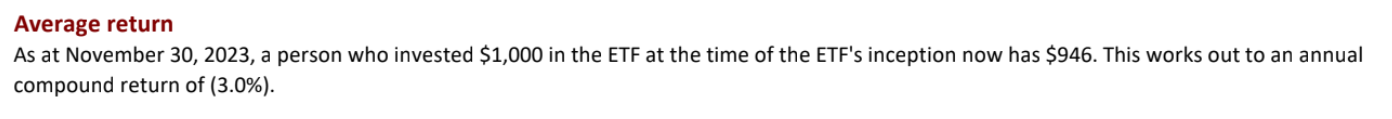

The PDF doesn't put a negative sign, so it's not fully Regular's fault for not adding the negative sign. However, looking at the PDF snippet, it's clear that it's a loss, so the return should be negative.

# Conclusion

In conclusion, FLARE is able to improve Regular PDF Extractions. With a small dataset of just 9 ETFs, in the best case, the LLM's performance was able to **improve from 91% to 96.5%**, when using EasyOCR. FLARE's capabilities includes the following:
* Retrieve imcomplete informations that Regular PDF extraction is not able to
* Fix some details the Regular PDF extraction miss

It's also good to mention that FLARE  didn't change any correct answers to wrong, so it doesn't cause hallucinations. In fact, it reduced the number of LLM Mistakes from 15 to 3, which means it **reduces hallcuination by 80%**.
### Issues
There are several issues with this demonstration:
* It's impossible to determine whether an OCR's mistake would've been correct if the OCR did it correctly.
* It's hard to determine whether the OCR's messy output that causes the LLM to get the wrong data should be considered the OCR's or the LLM's fault.
* The dataset is too small due to manual assesment
* FLARE causes a lot of resources, due to the multiple API calls to OpenAI

### Future Work
With more resources and time, here are several things that can be improved:
* Using the new PymuPDF4LLM to extract the texts, and for any tables or figures with texts that are images, use pytesseract to extract them or input them to the LLM as well.
* Use more datasets
* Assesment should be automated either with similarity functions that can asses the subtle differences that LLMs output or with another LLM that judges them.
* Other models performance should be observed, as we don't know how FLARE could improve on models that performs worse.